In [1]:
from halotools.sim_manager import CachedHaloCatalog, FakeSim
from halotools.empirical_models import PrebuiltHodModelFactory, Zheng07Cens, Zheng07Sats, TrivialPhaseSpace, NFWPhaseSpace, HodModelFactory
from halotools.mock_observables import return_xyz_formatted_array
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.constants import G
from Corrfunc.theory.wp import wp, find_fastest_wp_bin_refs
from astropy import constants as const
from astropy.io import ascii
import MCMC_data_file, zehavi_data_file_20, guo_data_file
from scipy.special import erf
from numpy.linalg import inv

[[86.99261699 53.45336892 46.93744279 37.8893941  27.35362518 21.69680628
  18.39167575 16.2765254  13.87536997  9.04604892  4.46487467]
 [53.45336892 58.21612348 44.63200058 35.40650391 26.16378967 20.52685156
  16.8214984  14.77056839 12.37819917  7.83923691  3.58279241]
 [46.93744279 44.63200058 44.05165966 34.23270991 25.40801856 20.26539119
  16.9491809  14.6742513  12.32563816  8.3604352   4.24962424]
 [37.8893941  35.40650391 34.23270991 29.83863862 22.41851226 18.02767739
  15.3645224  13.58972709 11.46523272  7.81483643  3.80759347]
 [27.35362518 26.16378967 25.40801856 22.41851226 18.5999595  15.2025725
  13.05222405 11.79537629  9.91797152  6.68378376  3.24243285]
 [21.69680628 20.52685156 20.26539119 18.02767739 15.2025725  13.22438254
  11.45153746 10.48767084  8.86966973  5.91752112  2.86560024]
 [18.39167575 16.8214984  16.9491809  15.3645224  13.05222405 11.45153746
  10.62158948  9.77533848  8.22245823  5.4028943   2.54766161]
 [16.2765254  14.77056839 14.6742513  13.5

In [2]:
wp_ng_vals = zehavi_data_file_20.get_wp()
print(wp_ng_vals)
bin_edges = zehavi_data_file_20.get_bins()
cov_matrix = zehavi_data_file_20.get_cov()
print(len(wp_ng_vals))
print(len(inv(cov_matrix)))

[0.00656, 366.1, 264.3, 184.0, 128.6, 84.7, 59.4, 42.9, 30.9, 21.9, 14.6, 8.24]
12
11


In [3]:
pi_max = 60.
Lbox = 250.

In [4]:
err = np.array([cov_matrix[i,i] for i in range(len(cov_matrix))])
bin_cen = (bin_edges[1:]+bin_edges[:-1])/2.

In [5]:
mean_ncen = cens_occ_model.mean_occupation(prim_haloprop = table['halo_vmax'])
mean_nsat = sats_occ_model.mean_occupation(prim_haloprop = table['halo_vmax'])

NameError: name 'cens_occ_model' is not defined

In [15]:
plt.semilogy((10**5.3)*table['halo_vmax']**(3.),(mean_ncen), ls='', marker='.',label="Cen (Vmax)")
plt.semilogy((10**5.3)*table['halo_vmax']**(3.),(mean_nsat), ls='', marker='.',label="Sat (Vmax)")
#plt.xscale('Log')
#plt.yscale('Log')
#plt.ylim(0,10)
#plt.xlim(0,1500)
#plt.semilogy(table['halo_mvir'], mean_ncen, ls='', marker='.',label="Cen (Mvir)")
#plt.semilogy(table['halo_mvir'], mean_nsat, ls='', marker='.',label="Sats (Mvir)")
#plt.semilogy(M,calc_mean_sat(M))
#plt.semilogy(M,calc_mean_cen(M))
#plt.semilogy(2*table['halo_rvir']*(table['halo_vmax']**2)/G, mean_ncen, ls='', marker='.',label="Cen")
#plt.semilogy(2*table['halo_rvir']*(table['halo_vmax']**2)/G, mean_nsat, ls='', marker='.',label="Sats")
plt.xscale('log')
plt.ylim(0.1,100)
plt.xlabel('Mvir')
plt.ylabel('<N>')
plt.legend()

NameError: name 'table' is not defined

In [16]:
v = np.logspace(1,4,100)

In [18]:
hist, bins = np.histogram(table['halo_mvir'],bins=50)
plt.semilogy(table['halo_vmax'],table['halo_mvir'], ls='', marker='.')
plt.plot(v,(10**5.3)*v**(3.),c='r', alpha=0.5)
for i in bins:
    plt.axhline(i)
plt.xscale('log')
plt.xlabel('vmax')
plt.ylabel('mvir')
plt.show()

NameError: name 'table' is not defined

In [19]:
mass_model = wp(Lbox,pi_max,1,bin_edges[0:28],pos_zdist[:,0],pos_zdist[:,1],pos_zdist[:,2],verbose=True,xbin_refine_factor=2, ybin_refine_factor=2, zbin_refine_factor=1)

In gridlink_index_particles_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 24,24,4.  Time taken =   0.045 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  4.652 secs


In [20]:
mvir_mean_ncen = cens_occ_model.mean_occupation(prim_haloprop = mvir_table['halo_mvir'])
mvir_mean_nsat = sats_occ_model.mean_occupation(prim_haloprop = mvir_table['halo_mvir'])

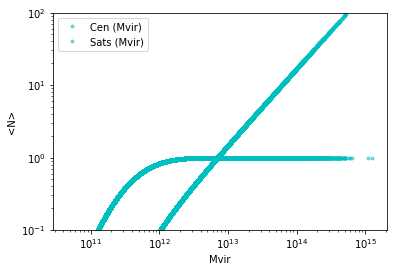

In [21]:
#plt.semilogy((10**5.3)*table['halo_vmax']**(3.),(mean_ncen), ls='', marker='.',label="Cen (Vmax)",color = "b")
#plt.semilogy((10**5.3)*table['halo_vmax']**(3.),(mean_nsat), ls='', marker='.',label="Sat (Vmax)",color = "b")
plt.semilogy(mvir_table['halo_mvir'], mvir_mean_ncen, ls='', marker='.',label="Cen (Mvir)", color = "c",alpha=0.5)
plt.semilogy(mvir_table['halo_mvir'], mvir_mean_nsat, ls='', marker='.',label="Sats (Mvir)", color = "c",alpha=0.5)

plt.xscale('log')
plt.ylim(0.1,100)
plt.xlabel('Mvir')
plt.ylabel('<N>')
plt.legend()

/anaconda3/envs/haloenv/lib/python3.7/site-packages/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key sigma_logM appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In particular, double-check that this parameter does not have conflicting meanings across components.

If you do not wish to see this message every time you instantiate, 
simply attach a _suppress_repeated_param_warning attribute 
to any of your component models and set this variable to ``True``.

  warn(msg % key)
/anaconda3/envs/haloenv/lib/python3.7/site-packages/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key logMmin appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In particular, double-check that this parameter does not have conflicting meanings across comp

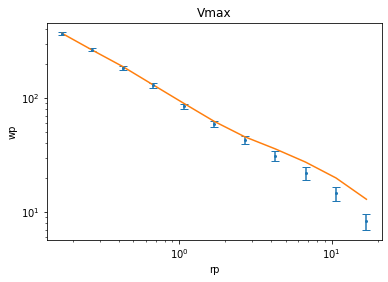

In [6]:
plt.errorbar(bin_cen,wp_ng_vals[1:len(wp_ng_vals)],yerr=np.sqrt(err),fmt='o',markersize=2,capsize=4,label='data')

#cens_occ_model = Zheng07Cens(prim_haloprop_key = 'halo_vmax')
cens_occ_model = Zheng07Cens()
cens_prof_model = TrivialPhaseSpace()

#sats_occ_model =  Zheng07Sats(prim_haloprop_key = 'halo_vmax', modulate_with_cenocc=True)
sats_occ_model =  Zheng07Sats(modulate_with_cenocc=True)
sats_prof_model = NFWPhaseSpace()

#halocat = CachedHaloCatalog(simname='bolplanck',redshift = 0.0)
#halocat = CachedHaloCatalog(fname = '/Users/lmezini/.astropy/cache/halotools/halo_catalogs/bolplanck/rockstar/hlist_1.00231.list.halotools_v0p4.hdf5',update_cached_fname = True)
#halocat = CachedHaloCatalog(fname = '/Users/lmezini/Downloads/hlist_1.00231.list.halotools_v0p1.hdf5',update_cached_fname = True)
halocat = CachedHaloCatalog(fname='/Users/lmezini/.astropy/cache/halotools/halo_catalogs/SMDPL/rockstar/2019-07-03-18-38-02-9731.dat.my_cosmosim_halos.hdf5')
halocat.redshift = 0.
param_samples=[[12.34754299,  1.08987777,  1.0655134,  10.42476261, 13.26314038]]
for i in range(1):
    model_instance = HodModelFactory(centrals_occupation = cens_occ_model, centrals_profile = cens_prof_model, 
                                 satellites_occupation = sats_occ_model, satellites_profile = sats_prof_model)

    model_instance.param_dict['logMmin'] = param_samples[i][0]#Mmin_val[i]
    model_instance.param_dict['sigma_logM'] = param_samples[i][1]#sigma_val[i]
    model_instance.param_dict['alpha'] = param_samples[i][2]#alpha_val[i]
    model_instance.param_dict['logM0'] = param_samples[i][3]#M0_val[i]
    model_instance.param_dict['logM1'] = param_samples[i][4]#M1_val[i]
   
    model_instance.populate_mock(halocat)
    mvir_table = model_instance.mock.halo_table
    pos = return_xyz_formatted_array(model_instance.mock.galaxy_table['x'], model_instance.mock.galaxy_table['y'],
                                 model_instance.mock.galaxy_table['z'],period = Lbox)
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    velz = model_instance.mock.galaxy_table['vz']
    pos_zdist = return_xyz_formatted_array(x,y,z, period = Lbox, velocity=velz, velocity_distortion_dimension='z')
    
    pi_max = 60.
    Lbox = 420.
    mass_model = wp(Lbox,pi_max,1,bin_edges,pos_zdist[:,0],pos_zdist[:,1],pos_zdist[:,2],verbose=True,xbin_refine_factor=1, ybin_refine_factor=2, zbin_refine_factor=1)
    plt.plot(bin_cen,mass_model['wp'],markersize=2,label='Vmax')
plt.title("Vmax")
#plt.legend()
plt.ylabel('wp')
plt.xlabel('rp')
plt.xscale('log')
plt.yscale('log')
plt.show()